In [15]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
import seaborn as sns
import matplotlib.pyplot as plt

boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
if 'Unnamed: 0' in boston_df.columns:
    boston_df.drop(labels= 'Unnamed: 0',axis= 'columns', inplace= True)
else:
    pass
boston_df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

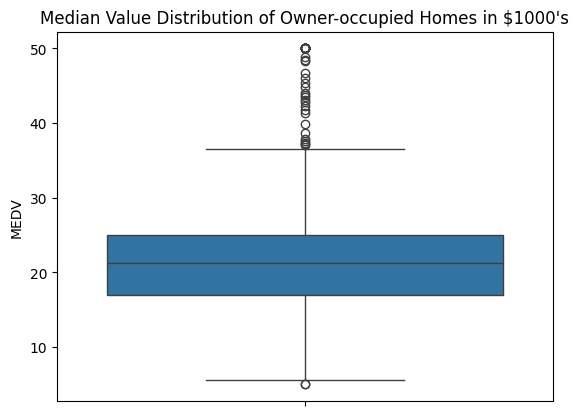

In [23]:
sns.boxplot(
    data= boston_df['MEDV']
)
plt.title("Median Value Distribution of Owner-occupied Homes in $1000's")
plt.show()

Provide a  bar plot for the Charles river variable

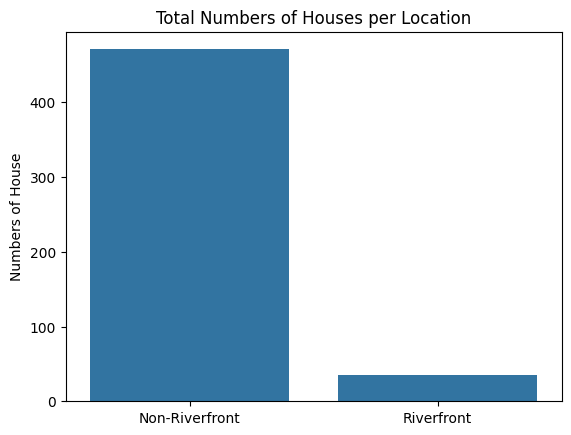

In [39]:
CHAS_count = boston_df['CHAS'].value_counts().reset_index()
CHAS_count['CHAS'] = CHAS_count['CHAS'].replace({0:'Non-Riverfront',1:'Riverfront'})

sns.barplot(
    data= CHAS_count
    ,x= 'CHAS'
    ,y= 'count'
)
plt.title('Total Numbers of Houses per Location')
plt.xlabel("")
plt.ylabel("Numbers of House")
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 0, '')

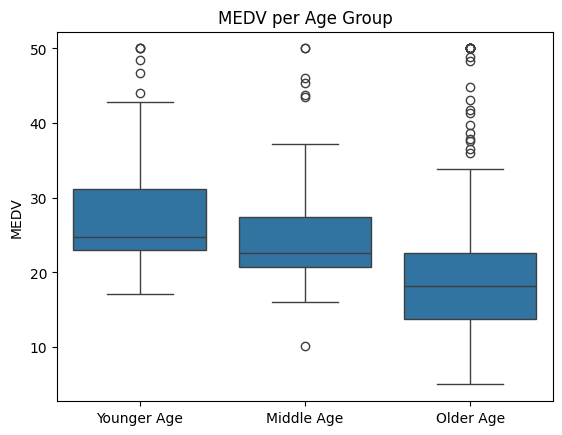

In [49]:
df1 = boston_df.copy()
df1['Age_Group'] = df1['AGE'].apply(lambda x:'Younger Age' if x <= 35 else 'Middle Age' if x <= 70 else 'Older Age')
df1 = df1.sort_values(by='AGE',ascending= True)
sns.boxplot(
    data= df1
    ,x= 'Age_Group'
    ,y= 'MEDV'
)
plt.title('MEDV per Age Group')
plt.xlabel('')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

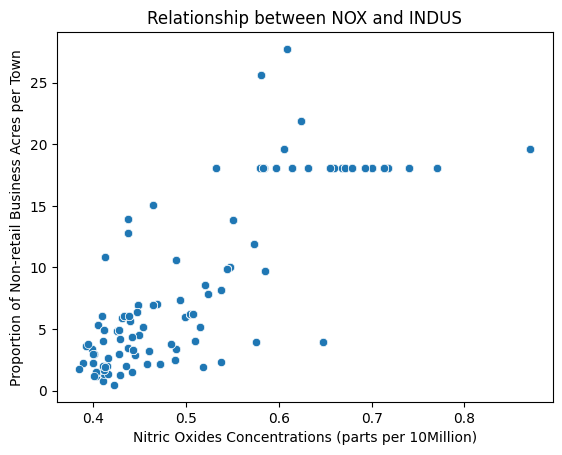

In [53]:
sns.scatterplot(
    data= boston_df
    ,x= 'NOX'
    ,y= 'INDUS'
)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric Oxides Concentrations (parts per 10Million)')
plt.ylabel('Proportion of Non-retail Business Acres per Town')
plt.show()

Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Count')

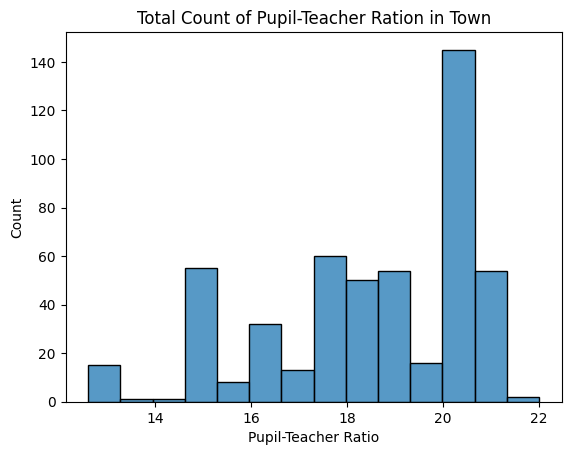

In [55]:
sns.histplot(
    data= boston_df['PTRATIO']
)
plt.title('Total Count of Pupil-Teacher Ration in Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Count')